# Earth Data Analytics

In [17]:
# import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# use geopandas for vector data and xarray for raster data
import geopandas as gpd
import rioxarray as rxr 

import earthpy as et

sns.set(font_scale=1.5, style="white")

In [8]:
# import data and set wd
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,
'earth-analytics','data'))

Extracted output to /Users/radleyciego/earth-analytics/data/colorado-flood/.


In [24]:
dem_pre_path = os.path.join("colorado-flood","spatial","boulder-leehill-rd","pre-flood","lidar","pre_DTM.tif")

dtm_pre_arr = rxr.open_rasterio(dem_pre_path)
dtm_pre_arr

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -3.4028235e+38
    scale_factor:   1.0
    add_offset:     0.0

In [10]:
# view the coordinate reference system (crs) & spatial extent
print("The CRS for this data is:", dtm_pre_arr.rio.crs)
print("The spatial extent is:", dtm_pre_arr.rio.bounds())

The CRS for this data is: EPSG:32613
The spatial extent is: (472000.0, 4434000.0, 476000.0, 4436000.0)


In [11]:
# view no data value
print("The no data value is:",dtm_pre_arr.rio.nodata)

The no data value is: -3.4028235e+38


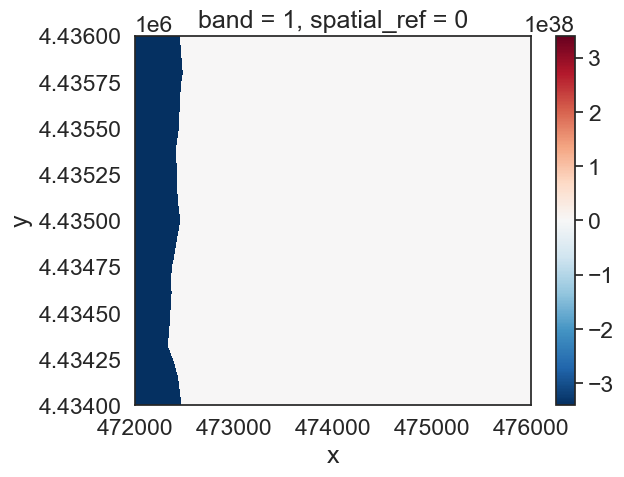

In [14]:
dtm_pre_arr.plot()
plt.show()

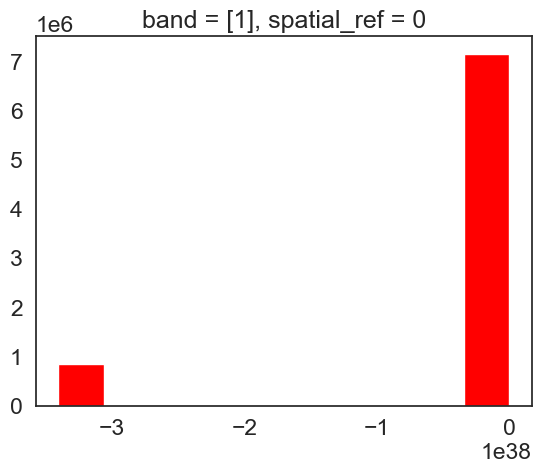

In [15]:
# a histogram can also be helpful to look at the range of values in your data
dtm_pre_arr.plot.hist(color="red")
plt.show()

In [18]:
print("the minimum raster value is:",np.nanmin(dtm_pre_arr.values))
print("the maximum raster value is:",np.nanmax(dtm_pre_arr.values))

the minimum raster value is: -3.4028235e+38
the maximum raster value is: 2087.43


In [19]:
rxr.open_rasterio(dem_pre_path,masked=True)

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [21]:
# remove the additional band dimension using .squeeze()
dtm_pre_arr.shape

(1, 2000, 4000)

In [25]:
# open the data and mask no data values
# Squeeze reduces the third dimension given there is only one "band" or layer to this data
dtm_pre_arr = rxr.open_rasterio(dem_pre_path,masked=True).squeeze()

# notice there are now only two dimensions to your array
dtm_pre_arr.shape

(2000, 4000)

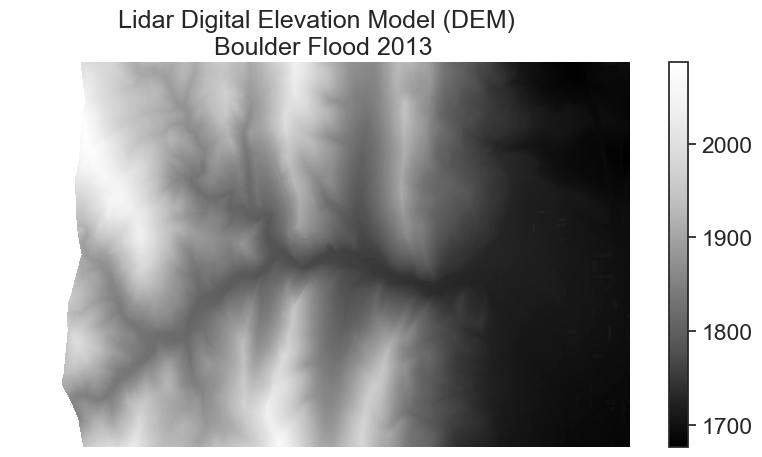

In [28]:
# plot the data again to see what changed
f, ax = plt.subplots(figsize=(10, 5))
dtm_pre_arr.plot(cmap="Greys_r",
ax=ax)
ax.set_title('Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013')
ax.set_axis_off()
plt.show()

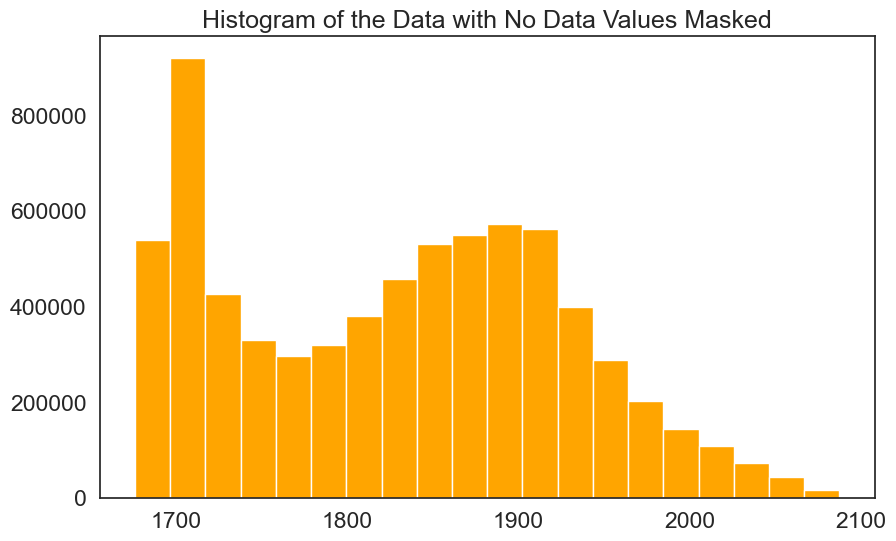

In [31]:
# the histogram now shows a reasonable distribution of pixel values

f, ax = plt.subplots(figsize=(10, 6))
dtm_pre_arr.plot.hist(color='orange',
bins=20)
ax.set_title("Histogram of the Data with No Data Values Masked")
plt.show()

In [33]:
# notice the now minimum values look more like an elevation value
print("The minimum raster value is: ",np.nanmin(dtm_pre_arr.data))
print("The maximum raster value is: ",np.nanmax(dtm_pre_arr.data))

The minimum raster value is:  1676.21
The maximum raster value is:  2087.43


## Plot Raster and Vector Data Together